<strong><b><font size="5">Forecasting - Previsões Para Séries Temporais - Modelo Base</font></b></strong>

A partir desta aula entraremos no incrível universo das previsões de séries temporais, uma habilidade valiosa e importante em praticamente qualquer área de negócio.

Serão diversas aulas e iremos estudar diferentes técnicas e modelos. Let's begin.

**Por que Forecasting é Importante?**

A previsão de séries temporais (chamado Forecasting) é uma área importante do aprendizado de máquina que geralmente é negligenciada.

É importante porque existem muitos problemas de previsão que envolvem um componente de tempo. Esses problemas são negligenciados porque é esse componente do tempo que dificulta o manuseio dos dados de séries temporais.

**O Tempo**

O tempo desempenha um papel básico, e muitas vezes irrelevante, nos conjuntos de dados que usamos em Machine Learning de forma tradicional (qualquer coisa que não seja série temporal).

São feitas previsões para novos dados quando o resultado real pode não ser conhecido até alguma data futura. O futuro está sendo previsto, mas todas as observações anteriores são quase sempre tratadas igualmente. Talvez com algumas dinâmicas temporais muito pequenas para superar a ideia de “desvio de conceito”, como usar apenas o último ano de observações em vez de todos os dados disponíveis.

Um conjunto de dados de séries temporais é diferente.

As séries temporais adicionam uma dependência explícita da ordem entre as observações: uma dimensão temporal.

Essa dimensão adicional é uma restrição e uma estrutura que fornece uma fonte de informações adicionais. E muito, muito valiosa.

**Descrevendo vs. Prevendo**

Temos objetivos diferentes, dependendo de estarmos interessados em entender um conjunto de dados ou fazer previsões.

A compreensão de um conjunto de dados, chamado análise de séries temporais, pode ajudar a fazer melhores previsões, mas não é necessária e pode resultar em um grande investimento técnico em tempo e experiência, não diretamente alinhados com o resultado desejado, que está prevendo o futuro.

Na modelagem descritiva ou análise de séries temporais, uma série temporal é modelada para determinar seus componentes em termos de padrões sazonais, tendências, relação a fatores externos e similares. Por outro lado, a previsão de séries temporais usa as informações em uma série temporal (talvez com informações adicionais) para prever valores futuros dessa série.

**Análise de Séries Temporais**

Ao usar estatísticas clássicas, a principal preocupação é a análise de séries temporais.

A análise de séries temporais envolve o desenvolvimento de modelos que melhor capturam ou descrevem uma série temporal observada para entender as causas. Este campo de estudo busca o "porquê" por trás de um conjunto de dados de séries temporais.

Isso geralmente envolve fazer suposições sobre a forma dos dados e decompor as séries temporais.

A qualidade de um modelo descritivo é determinada por quão bem ele descreve todos os dados disponíveis e a interpretação que fornece para melhor informar o domínio do problema.

O objetivo principal da análise de séries temporais é desenvolver modelos matemáticos que forneçam descrições plausíveis a partir de dados de amostra.

Isso é o que chamamos de Modelagem Estatística.

**Previsão de Séries Temporais**

Fazer previsões sobre o futuro é chamado de extrapolação no tratamento estatístico clássico de dados de séries temporais.

Os campos mais modernos se concentram no tópico e se referem a ele como previsão de séries temporais.

A previsão envolve ajustar os modelos aos dados históricos e usá-los para prever observações futuras.

Uma distinção importante na previsão é que o futuro está completamente indisponível e só deve ser estimado a partir do que já aconteceu.

O objetivo da análise de séries temporais é geralmente duplo: entender ou modelar os mecanismos estocásticos que dão origem a uma série observada e prever os valores futuros de uma série com base no histórico dessa série.

Isso é o que chamamos de Modelagem Preditiva.

### Carregando os Pacotes Usados Neste Jupyter Notebook

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime
#from pandas import Series

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

## Definição do Problema de Negócio

A HappyMoonVC é uma Venture Capital (VC).

Venture Capital (VC) é um tipo de fundo de investimento focado em capital de crescimento para empresas de médio porte que já possuem carteira de clientes e receita, mas que ainda precisam dar um salto de crescimento. 

VCs investem em empresas iniciantes, Startups e emergentes que foram consideradas com alto potencial de crescimento ou que demonstraram alto crescimento (em termos de número de funcionários, receita anual ou ambos).

A HappyMoonVC está analisando um novo e promissor negócio sugerido por uma Startup, o GoInRail.

O GoInRail é um método de transporte inovador que usa a tecnologia de propulsão a jato para executar um veículo similar a um Drone, mas sobre trilhos (que mantém o Drone carregado com energia elétrica) e transportar pessoas em alta velocidade!

O investimento só fará sentido se o GoInRail conseguir mais de 1 milhão de usuários mensais nos próximos 18 meses.

Nosso trabalho é analisar dados de séries temporais com a demanda de transporte em uma determinada região e prever a demanda pelo GoInRail, que ajude a HappyMoonVC a tomar sua decisão de investimento.

## Conjunto de Dados

Usaremos conjuntos de dados fictícios que mostram a demanda de clientes por transporte em uma determinada região. Para cada dia da semana, foi contabilizado quantas pessoas usaram o sistema de transporte na região. Os dados tem registros dos anos de 2017, 2018 e 2019.

São fornecidos 2 datasets:

- O primeiro possui 3 colunas, com id, data e total de clientes que usaram algum tipo de transporte. Será nossos dados de treino.

- O segundo possui 2 colunas, com id e data para os anos de 2019 e 2020. Será nosso dataset de teste.

In [2]:
# Carrega os dados
dados_treino = pd.read_csv("data/train.csv")
dados_teste = pd.read_csv("data/test.csv")

## Análise Exploratória dos Dados

Vamos preparar os dados e realizar diversas análises a fim de identificar possíveis padrões nos dados que ajudem mais tarde na criação do modelo preditivo.

#### Dados de Treino

In [3]:
# Dados
dados_treino.head()

,ID,Datetime,Count
0,0,25-08-2017 00:00,8
1,1,25-08-2017 01:00,2
2,2,25-08-2017 02:00,6
3,3,25-08-2017 03:00,2
4,4,25-08-2017 04:00,2


In [4]:
# Tipos de dados
dados_treino.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [5]:
# Shape
dados_treino.shape

(18288, 3)

#### Dados de Teste

In [6]:
# Dados
dados_teste.head()

,ID,Datetime
0,18288,26-09-2019 00:00
1,18289,26-09-2019 01:00
2,18290,26-09-2019 02:00
3,18291,26-09-2019 03:00
4,18292,26-09-2019 04:00


In [7]:
# Tipos de dados
dados_teste.dtypes

ID           int64
Datetime    object
dtype: object

In [8]:
# Shape
dados_teste.shape

(5112, 2)

Vamos fazer algumas transformações nos dados para poder criar alguns gráficos e verificar se temos algum padrão disponível.

In [9]:
# Converte a coluna Datetime para o tipo correto
dados_treino['Datetime'] = pd.to_datetime(dados_treino.Datetime, format = '%d-%m-%Y %H:%M')

In [10]:
# Verifica os tipos de dados
dados_treino.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [11]:
# Converte a coluna Datetime para o tipo correto
dados_teste['Datetime'] = pd.to_datetime(dados_teste.Datetime, format = '%d-%m-%Y %H:%M')

In [12]:
# Verifica os tipos de dados
dados_treino.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [13]:
# Vamos extrair os detalhes da coluna Datetime: ano, mês, dia e hora
for i in (dados_treino, dados_teste):
    i['ano'] = i.Datetime.dt.year
    i['mes'] = i.Datetime.dt.month
    i['dia'] = i.Datetime.dt.day
    i['hora'] = i.Datetime.dt.hour

In [14]:
# Precisamos do dia da semana também
dados_treino['dia_semana'] = dados_treino['Datetime'].dt.dayofweek

In [15]:
# Seria bom verificar se o fato de ser final de semana ou não impacta no uso de transporte. 
# Vamos extrair essa informação. Dias da semana iguais a 5 ou 6 são sábado e domingo.

# Criamos uma função, onde marcamos final de semana como 1 e dias úteis como 0
def converteFimSemana(registro):
    if registro.dayofweek == 5 or registro.dayofweek == 6:
        return 1
    else:
        return 0

In [16]:
# Agora aplicamos a função
dados_treino['final_semana'] = dados_treino['Datetime'].apply(converteFimSemana)

In [17]:
# Vejamos como ficou o dataset
dados_treino.head()

,ID,Datetime,Count,ano,mes,dia,hora,dia_semana,final_semana
0,0,2017-08-25 00:00:00,8,2017,8,25,0,4,0
1,1,2017-08-25 01:00:00,2,2017,8,25,1,4,0
2,2,2017-08-25 02:00:00,6,2017,8,25,2,4,0
3,3,2017-08-25 03:00:00,2,2017,8,25,3,4,0
4,4,2017-08-25 04:00:00,2,2017,8,25,4,4,0


In [18]:
# Refinamos os dados para o gráfico

# Definimos o índice do dataset
dados_treino.index = dados_treino['Datetime']

# Removemos a coluna ID, pois ela não é relevante neste caso
features = dados_treino.drop('ID',1)

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dados_treino['Count']

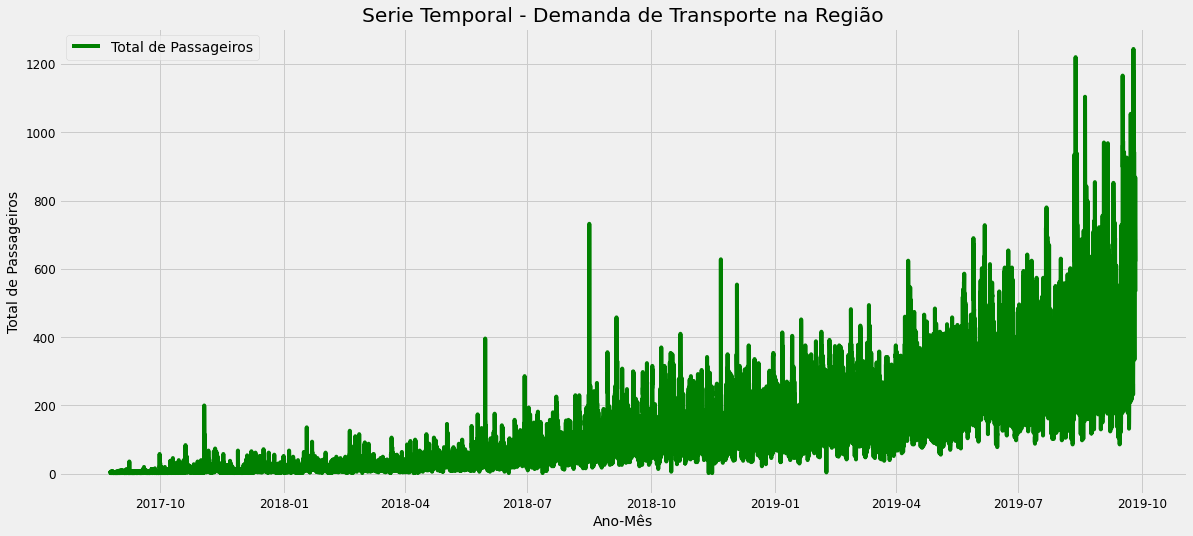

In [19]:
# Plot
plt.title("Serie Temporal - Demanda de Transporte na Região")
plt.plot(target, label = "Total de Passageiros", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Passageiros")
plt.legend(loc = "best")

Percebemos que há claramente uma tendência de aumento no uso de transporte na região ao longo do tempo. Vamos extrair mais detalhes com outros graficos.

<AxesSubplot:xlabel='ano'>

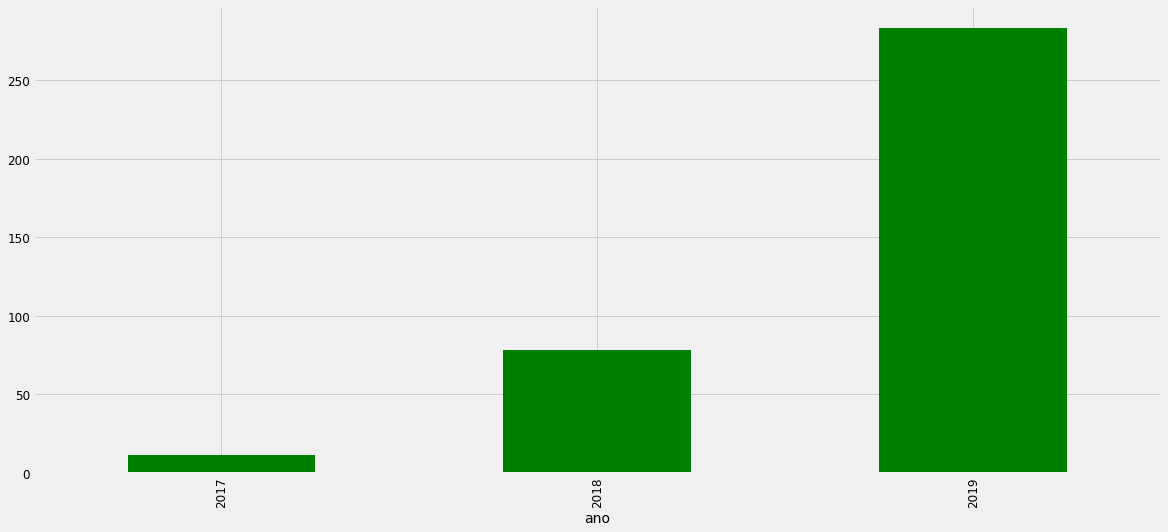

In [20]:
# Vamos criar um gráfico de barras com a demanda de transporte por ano. 
# A interpretação do gráfico é bem clara.
dados_treino.groupby('ano')['Count'].mean().plot.bar(color = 'green')

<AxesSubplot:xlabel='mes'>

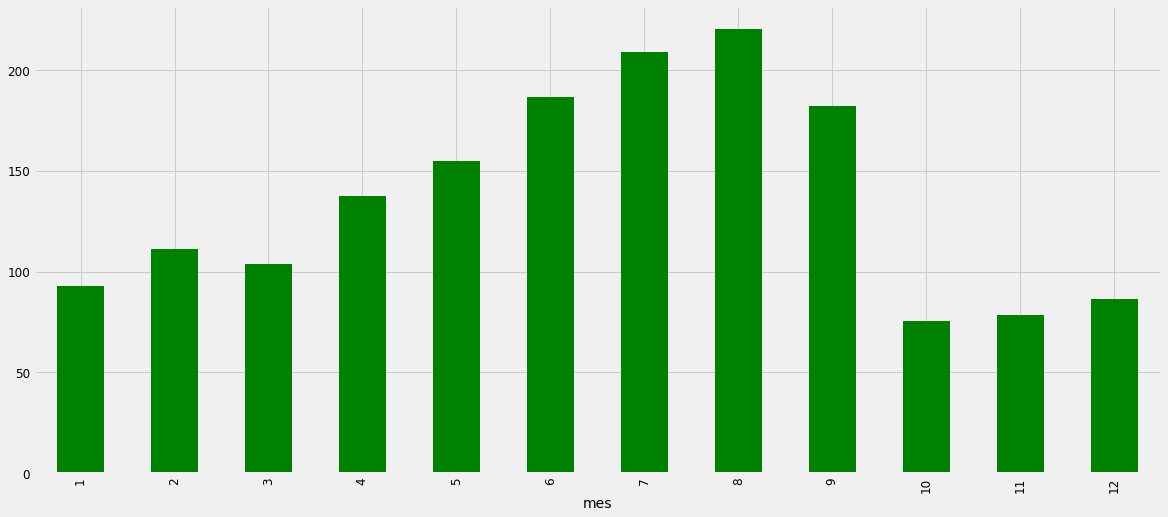

In [21]:
# Vamos criar um gráfico de barras com a demanda de transporte por mês. 
# A demanda atinge seu pico no mês de Agosto e cai nos meses seguintes.
dados_treino.groupby('mes')['Count'].mean().plot.bar(color = 'green')

<AxesSubplot:title={'center':'Média de Passageiros Por Mês a Cada Ano'}, xlabel='ano,mes'>

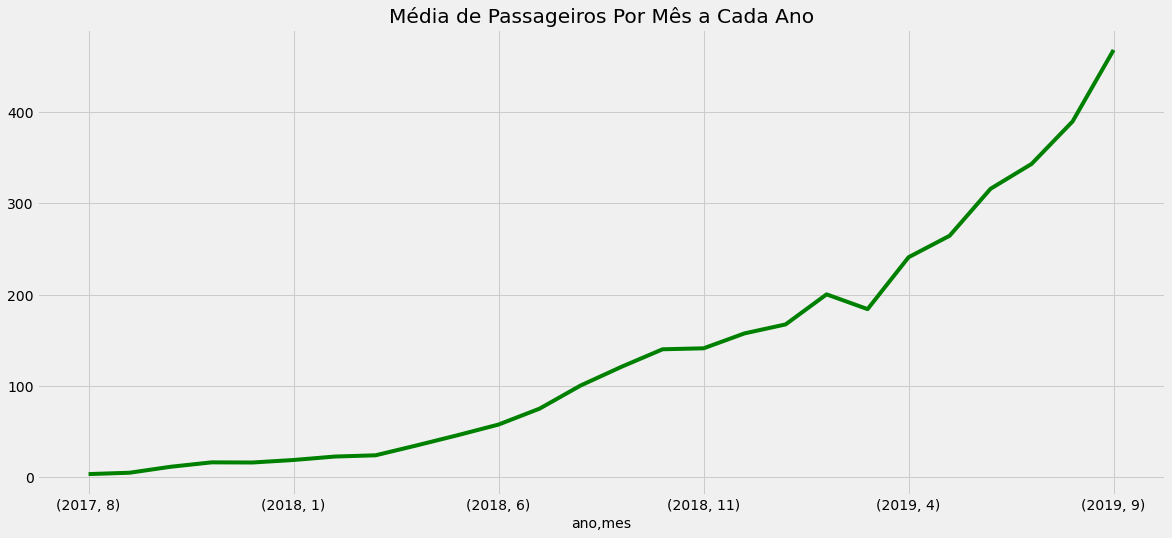

In [22]:
# Vamos calcular a média mensal por ano
# Em média, há um crescimento mensal de demanda a cada ano
media_mensal = dados_treino.groupby(['ano','mes'])['Count'].mean()
media_mensal.plot(title = "Média de Passageiros Por Mês a Cada Ano", fontsize = 14, color = 'green')

<AxesSubplot:xlabel='dia'>

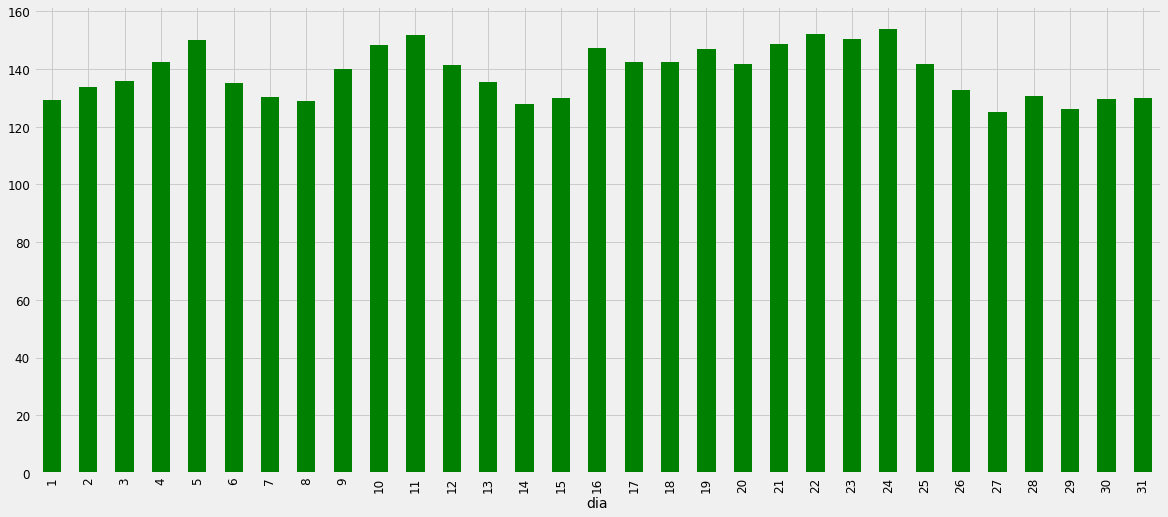

In [23]:
# E qual será a média diária por dia do mês? Vamos checar.
# O dia do mês não parece ser relevante para a demanda.
dados_treino.groupby('dia')['Count'].mean().plot.bar(color = 'green')

<AxesSubplot:xlabel='hora'>

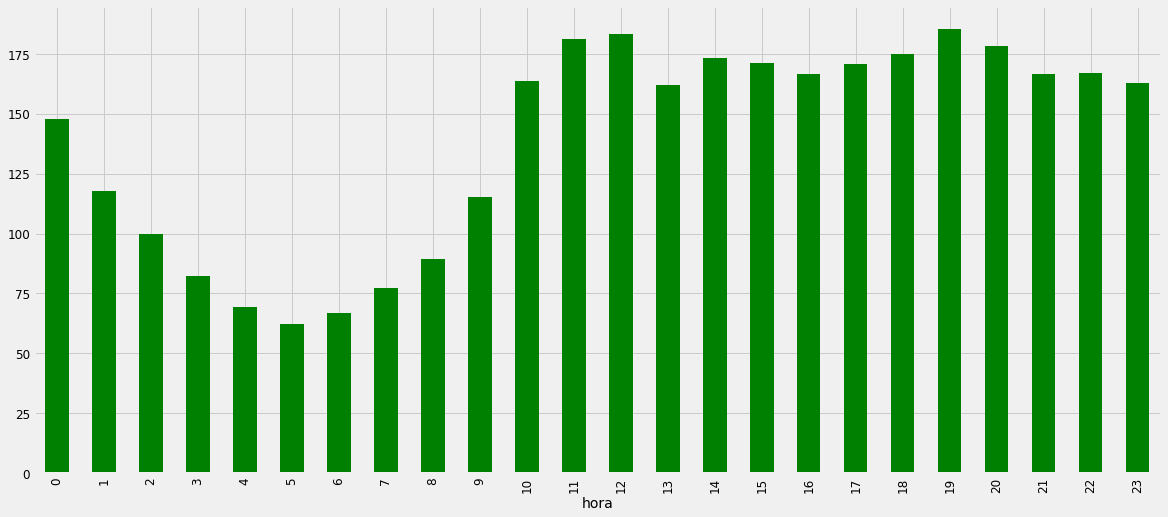

In [24]:
# Vamos descer mais um nível e analisar a demanda média por hora.
# Como era de se esperar, na madrugada a média é menor do que em outras horas do dia.
dados_treino.groupby('hora')['Count'].mean().plot.bar(color = 'green')

<AxesSubplot:xlabel='final_semana'>

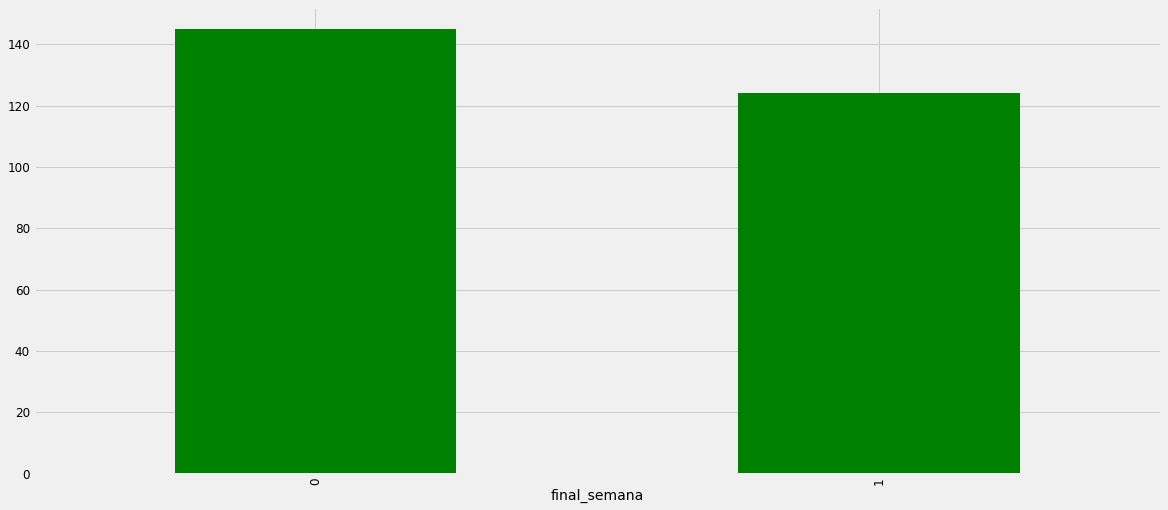

In [25]:
# Por fim, vejamos a média por final de semana ou dia útil.
# Com era de se esperar, no final de semana a demanda é menor, mas não muito diferente dos dias úteis.
dados_treino.groupby('final_semana')['Count'].mean().plot.bar(color = 'green')

Vamos criar um gráfico com 4 séries representando a demanda média por mês, por semana, por dia e por hora para confirmar a tendência de crescimento.

In [26]:
# Coletamos o Timestamp da coluna Datetime
dados_treino.Timestamp = pd.to_datetime(dados_treino.Datetime, format = '%d-%m-%y %H:%M')

# Colocamos o Timestamp como índice da série
dados_treino.index = dados_treino.Timestamp

In [27]:
# Série temporal da média de demanda de transporte por mês
seria_media_mes = dados_treino.resample('M').mean()

# Série temporal da média de demanda de transporte por semana
seria_media_semana = dados_treino.resample('W').mean() 

# Série temporal da média de demanda de transporte por dia
seria_media_dia = dados_treino.resample('D').mean() 

# Série temporal da média de demanda de transporte por hora
seria_media_hora = dados_treino.resample('H').mean() 

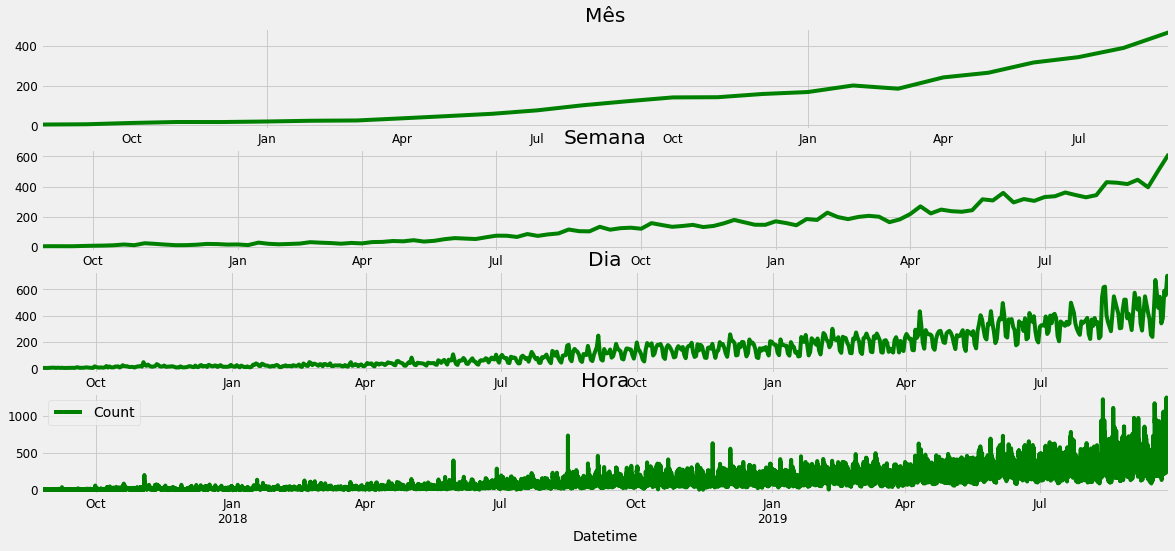

In [28]:
# Plot
fig, axs = plt.subplots(4,1) 
seria_media_mes.Count.plot(title = 'Mês', fontsize = 12, ax = axs[0], color = 'green') 
seria_media_semana.Count.plot(title = 'Semana', fontsize = 12, ax = axs[1], color = 'green') 
seria_media_dia.Count.plot(title = 'Dia', fontsize = 12, ax = axs[2], color = 'green') 
seria_media_hora.Count.plot(title = 'Hora', fontsize = 12, ax = axs[3], color = 'green') 
plt.legend(loc = "best")
plt.show()

## Pré-Processamento

Já coletamos bastante informação sobre nossos dados. Essa compreensão ajuda a entender se nosso modelo preditivo é eficiente. Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

In [29]:
# Os dados de treino serão divididos em dados de treino e validação.
# Observe que os registros são separados em ordem cronológica.
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

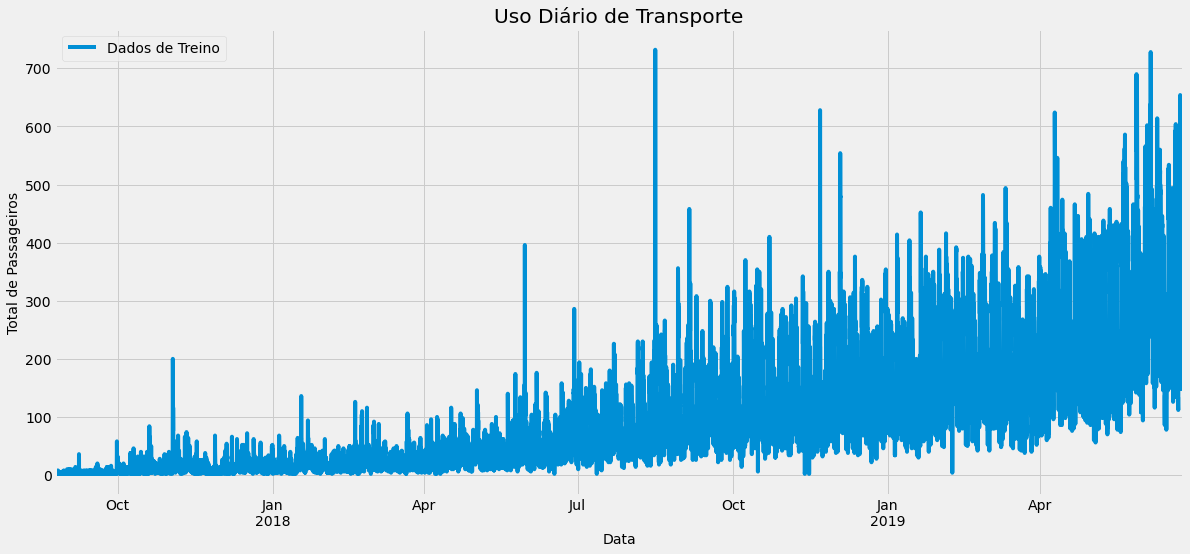

In [30]:
# Plot
df_treino.Count.plot(title = 'Uso Diário de Transporte', fontsize = 14, label = 'Dados de Treino') 
plt.xlabel("Data") 
plt.ylabel("Total de Passageiros") 
plt.legend(loc = 'best') 
plt.show()

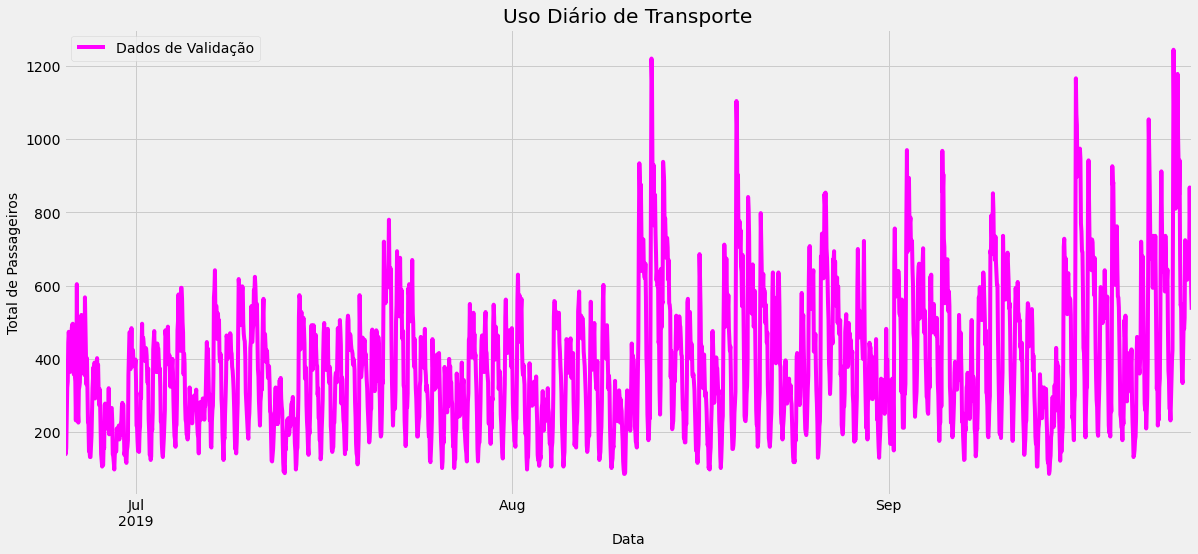

In [31]:
# Plot
df_valid.Count.plot(title = 'Uso Diário de Transporte', fontsize = 14, label = 'Dados de Validação', color = 'magenta') 
plt.xlabel("Data") 
plt.ylabel("Total de Passageiros") 
plt.legend(loc = 'best') 
plt.show()

## Forecasting - Modelagem Preditiva Para Séries Temporais

Criaremos vários modelos para este problema que temos em mãos, aumentando o grau de complexidade a cada versão.

Mas toda caminhada deve começar com o primeiro passo. Vamos começar com o modelo preditivo mais simples que podemos criar.

### Método Naive

Técnica de estimativa na qual os dados reais do último período são usados como previsão desse período, sem ajustá-los ou tentar estabelecer fatores causais. É usado apenas para comparação com as previsões geradas pelas melhores técnicas (sofisticadas).

Naive = ingênuo

Não há técnica avançada aqui e apenas usamos como ponto de partida. Qualquer modelo mais avançado deve apresentar resultados superiores ao Método Naive.

In [32]:
# Criamos um array com os valores da variável target em treino
array_count_treino = np.asarray(df_treino.Count)
array_count_treino

array([  8,   2,   6, ..., 352, 390, 332], dtype=int64)

In [33]:
# Cria uma cópia dos dados de validação
df_valid_cp = df_valid.copy()
df_valid_cp.head()

,ID,Datetime,Count,ano,mes,dia,hora,dia_semana,final_semana
Datetime,,,,,,,,,
2019-06-25 02:00:00,16058,2019-06-25 02:00:00,218,2019,6,25,2,1,0
2019-06-25 03:00:00,16059,2019-06-25 03:00:00,244,2019,6,25,3,1,0
2019-06-25 04:00:00,16060,2019-06-25 04:00:00,168,2019,6,25,4,1,0
2019-06-25 05:00:00,16061,2019-06-25 05:00:00,140,2019,6,25,5,1,0
2019-06-25 06:00:00,16062,2019-06-25 06:00:00,156,2019,6,25,6,1,0


In [34]:
# Previsão

# Veja como o método é mesmo Naive
# Os dados reais (de treino) são usados como previsão para os dados de validação, 
# sem ajustá-los ou tentar estabelecer fatores causais.

# Sim, isso é o Método Naive!
df_valid_cp['previsao_naive'] = array_count_treino[len(array_count_treino) - 1] 

In [35]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid_cp[['Count', 'previsao_naive']].head()

,Count,previsao_naive
Datetime,,
2019-06-25 02:00:00,218,332
2019-06-25 03:00:00,244,332
2019-06-25 04:00:00,168,332
2019-06-25 05:00:00,140,332
2019-06-25 06:00:00,156,332


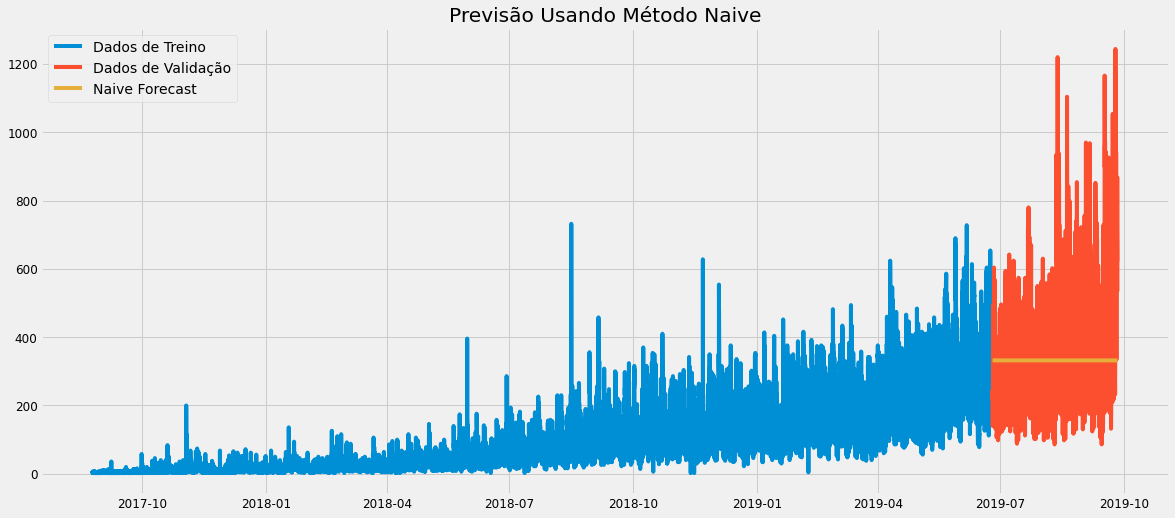

In [36]:
# Plot
plt.title("Previsão Usando Método Naive") 
plt.plot(df_treino.index, df_treino['Count'], label = 'Dados de Treino') 
plt.plot(df_valid.index, df_valid['Count'], label = 'Dados de Validação') 
plt.plot(df_valid_cp.index, df_valid_cp['previsao_naive'], label = 'Naive Forecast') 
plt.legend(loc = 'best') 
plt.show()

Pronto! Temos a previsão da nossa série! Você apresentaria esse modelo ao investidor disposto a investir no seu negócio? Espero que não!

Então vamos trabalhar para criar um modelo robusto nas próximas aulas. Mas antes, vamos calcular a taxa de erro do modelo.

In [37]:
# Define valor real e valor previsto
y_true = df_valid_cp.Count
y_pred = df_valid_cp.previsao_naive

In [38]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

195.06210118417584
